In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import RFECV   
from precision_recall_cutoff import precision_recall_cutoff as prc
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt    
from tqdm import tqdm
import pandas as pd
import numpy as np  


pd.options.display.max_rows = 999
pd.options.display.max_columns = 999



train_data = pd.read_csv('diabetes_full_train.csv')

In [2]:

X = train_data.drop(columns = 'Diabetes_012')


from sklearn.preprocessing import label_binarize

y = train_data.Diabetes_012.astype(np.uint8)
n_classes = len(set(y))

Y = label_binarize(train_data.Diabetes_012, classes=[*range(n_classes)])

results_to_append = []
for i in tqdm(range(0,1)):


    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2)
    X_val, X_test, Y_val, Y_test = train_test_split(X, Y, test_size = 0.5)

    
    
    
    
    DTC_X_train = X_train[['Interaction_1',
    'Log_BMI',
    'Veggies',
    'Smoker',
    'PhysActivity',
    'MentHlth',
    'Interaction_5',
    'HeartDiseaseorAttack']]
    
    DTC_X_train_top_6 = DTC_X_train[DTC_X_train.columns[0:6]]
    DTC_X_train_top_7 = DTC_X_train[DTC_X_train.columns[0:7]]
    

    RF_X_train = X_train[['Interaction_1',
    'Log_BMI',
    'PhysHlth',
    'MentHlth',
    'Fruits',
    'Age',
    'Smoker',
    'College_1_3']]
    
 
    RF_X_train_top_6 = RF_X_train[RF_X_train.columns[0:6]]
    RF_X_train_top_7 = RF_X_train[RF_X_train.columns[0:7]]

    ADA_DTC_X_train = X_train[['Interaction_1',
    'Log_BMI',
    'Veggies',
    'Stroke',
    'Smoker',
    'Male',
    'Female',
    'PhysHlth',
    'Interaction_5']]
    
    ADA_DTC_X_train_top_6 = ADA_DTC_X_train[ADA_DTC_X_train.columns[0:6]]
    ADA_DTC_X_train_top_7 = ADA_DTC_X_train[ADA_DTC_X_train.columns[0:7]]
    
    GBC_X_train = X_train[['Tree_1',
                      'Log_BMI',
                      'Interaction_5',
                      'Interaction_3',
                      'Interaction_1',
                      'GenHlth',
                      'Age',
                      '75,000+']]
    
    GBC_X_train_top_6 = GBC_X_train[GBC_X_train.columns[0:6]]
    GBC_X_train_top_7 = GBC_X_train[GBC_X_train.columns[0:7]]
    
    
    
    
    DTC_X_val = X_val[['Interaction_1',
    'Log_BMI',
    'Veggies',
    'Smoker',
    'PhysActivity',
    'MentHlth',
    'Interaction_5',
    'HeartDiseaseorAttack']]
    
    DTC_X_val_top_6 = DTC_X_val[DTC_X_val.columns[0:6]]
    DTC_X_val_top_7 = DTC_X_val[DTC_X_val.columns[0:7]]
    

    RF_X_val = X_val[['Interaction_1',
    'Log_BMI',
    'PhysHlth',
    'MentHlth',
    'Fruits',
    'Age',
    'Smoker',
    'College_1_3']]
    
 
    RF_X_val_top_6 = RF_X_val[RF_X_val.columns[0:6]]
    RF_X_val_top_7 = RF_X_val[RF_X_val.columns[0:7]]

    ADA_DTC_X_val = X_val[['Interaction_1',
    'Log_BMI',
    'Veggies',
    'Stroke',
    'Smoker',
    'Male',
    'Female',                    
    'PhysHlth',
    'Interaction_5']]
    
    ADA_DTC_X_val_top_6 = ADA_DTC_X_val[ADA_DTC_X_val.columns[0:6]]
    ADA_DTC_X_val_top_7 = ADA_DTC_X_val[ADA_DTC_X_val.columns[0:7]]
    
    GBC_X_val = X_val[['Tree_1',
    'Log_BMI',
    'Interaction_5',
    'Interaction_3',
    'Interaction_1',
    'GenHlth',
    'Age',
    '75,000+']]
    
    GBC_X_val_top_6 = GBC_X_val[GBC_X_val.columns[0:6]]
    GBC_X_val_top_7 = GBC_X_val[GBC_X_val.columns[0:7]]
    
    
    DTC_X_test = X_test[['Interaction_1',
    'Log_BMI',
    'Veggies',
    'Smoker',
    'PhysActivity',
    'MentHlth',
    'Interaction_5',
    'HeartDiseaseorAttack']]
    
    DTC_X_test_top_6 = DTC_X_test[DTC_X_test.columns[0:6]]
    DTC_X_test_top_7 = DTC_X_test[DTC_X_test.columns[0:7]]
    

    RF_X_test = X_test[['Interaction_1',
    'Log_BMI',
    'PhysHlth',
    'MentHlth',
    'Fruits',
    'Age',
    'Smoker',
    'College_1_3']]
    
 
    RF_X_test_top_6 = RF_X_test[RF_X_test.columns[0:6]]
    RF_X_test_top_7 = RF_X_test[RF_X_test.columns[0:7]]

    ADA_DTC_X_test = X_test[['Interaction_1',
    'Log_BMI',
    'Veggies',
    'Stroke',
    'Smoker',
    'Male',
    'Female',
    'PhysHlth',
    'Interaction_5']]
    
    ADA_DTC_X_test_top_6 = ADA_DTC_X_test[ADA_DTC_X_test.columns[0:6]]
    ADA_DTC_X_test_top_7 = ADA_DTC_X_test[ADA_DTC_X_test.columns[0:7]]
    
    GBC_X_test = X_test[['Tree_1',
    'Log_BMI',
    'Interaction_5',
    'Interaction_3',
    'Interaction_1',
    'GenHlth',
    'Age',
    '75,000+']]
    
    GBC_X_test_top_6 = GBC_X_test[GBC_X_test.columns[0:6]]
    GBC_X_test_top_7 = GBC_X_test[GBC_X_test.columns[0:7]]
    

    
    
    
    
    
    
    
    
    
    
    ADA_model_top_8 = OneVsRestClassifier(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                            min_samples_leaf=5,
                                                            min_samples_split=10),
                                                            learning_rate=0.1, 
                                                            n_estimators=100)).fit(ADA_DTC_X_train,Y_train)
    
    ADA_val_pred_top_8 = ADA_model_top_8.predict_proba(ADA_DTC_X_val)
    ADA_test_pred_top_8 = ADA_model_top_8.predict_proba(ADA_DTC_X_test)
    

    ADA_val_label_top_8 = ADA_model_top_8.predict(ADA_DTC_X_test)

    


   

100%|██████████| 1/1 [00:57<00:00, 57.33s/it]


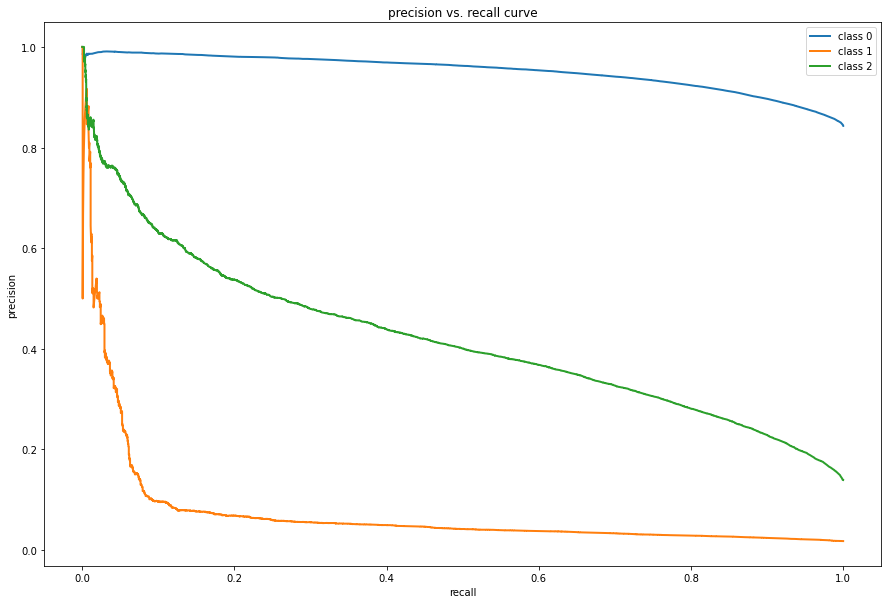

In [46]:
from sklearn.metrics import precision_recall_curve, f1_score

precision = dict()
recall = dict()

plt.figure(figsize = (15,10))
for i in range(n_classes):

        precision[i], recall[i], _ = precision_recall_curve(Y_val[:, i], ADA_val_pred_top_8[:, i])
        
        
        
        plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()